# Measuring Max Drawdown

Another measure of risk other than volatility. Some people say that volatility is not so bad because 'it just is what it is' so we can look at other measures to calculate risk.

Max Drawdown -  The maximum loss from the previous high to a subsequent low (the worst return you could have experienced if you bought high and sold low).

## Computing Drawdowns

- Computing drawdowns is to construct a wealth index which is just a model of the hypothetical buy-and-hold investments in the asset
- Look at the prior peak at any point in time
- The drawdown is the difference between the prior peak and the trough (low). We can plot these drawdowns over time to be able to see how long it takes to recover from these drawdowns

## Calmar Ratio

The Calmar Ratio is defined as the ratio of the annualised return over the trailing 36 months compared to the maximum drawdown over those trailing 36 months. You can also incoprprate the risk free rate and use the excess return rate in this measure.

## Cautionary notes about drawdowns

- They are entirely defined by two points and hence are very sensetive to outliers
- They depend on the frequency of observations, in general, a very deep drawdown on a daily or weekly basis may almost completely diappear or move ot a very different location based on monthly data
- In spite of these shortcomings, drawdowns are closely monitored and popular amongst practitioners even though other measures like VAR and CVAR are more robust measures of extreme risk

# Lab Session - Drawdowns

In [1]:
import pandas as pd
import numpy as np

## Import and Clean Data

<AxesSubplot:>

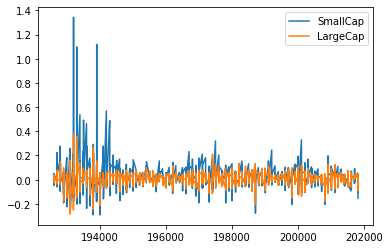

In [6]:
# import same data as last lab session
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', 
                        header = 0,
                        index_col = 0,
                        parse_dates = True,
                        na_values = -99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [4]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [5]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [9]:
# convert index of dates to datetime
rets.index = pd.to_datetime(rets.index, format = '%Y%m')

In [10]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [11]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [12]:
# treat each date as a period over that month instead of the first of that month
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [14]:
# now we have a time series data set
rets.loc['1975']

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [15]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [16]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


## Compute Drawdowns

In [18]:
# compute the growth over time using the compounded returns and the cumulative product
wealth_index = 1000 * (1 + rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

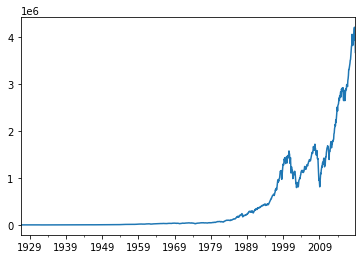

In [19]:
wealth_index.plot.line()

In [22]:
# this cummax method shows the max at any given time
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

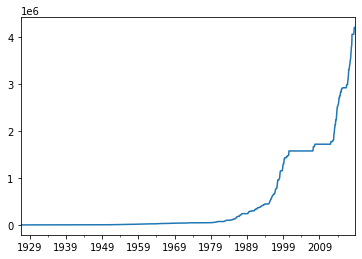

In [23]:
previous_peaks.plot.line()

<AxesSubplot:>

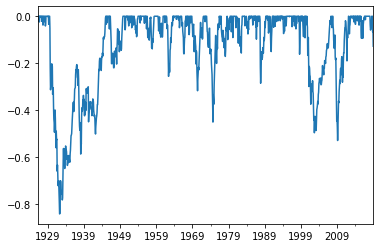

In [26]:
# compute drawdowns
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot.line()

In [27]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [28]:
# max drawdown
drawdown.min()

-0.8400375277943123

In [29]:
# max drawdown since 1975
drawdown.loc['1975':].min()

-0.5280945042309304

In [32]:
# find the date of the max drawdown since 1975
drawdown.loc['1975':].idxmin()

Period('2009-02', 'M')

In [33]:
# date of max drawdown 
drawdown.idxmin()

Period('1932-05', 'M')

In [53]:
def drawdown(return_series: pd.Series):
    '''
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    '''
    wealth_index = 1000 * (1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdowns
    })

In [37]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [38]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

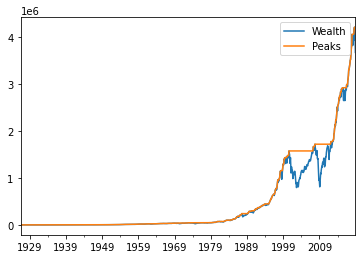

In [39]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot.line()

<AxesSubplot:>

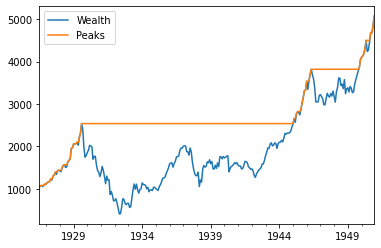

In [40]:
drawdown(rets[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot.line()

In [41]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [42]:
drawdown(rets['LargeCap'])['Drawdown'].min()

-0.8400375277943123

In [43]:
drawdown(rets['SmallCap'])['Drawdown'].min()

-0.8330007793945303

In [44]:
drawdown(rets['SmallCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [45]:
drawdown(rets['LargeCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [47]:
drawdown(rets['1940':]['SmallCap'])['Drawdown'].min()

-0.7000596091967917

In [48]:
drawdown(rets['1940':]['SmallCap'])['Drawdown'].idxmin()

Period('1974-12', 'M')

In [49]:
drawdown(rets['1975':]['SmallCap'])['Drawdown'].min()

-0.6312068077252386

In [50]:
drawdown(rets['1975':]['SmallCap'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [51]:
drawdown(rets['1975':]['LargeCap'])['Drawdown'].min()

-0.5280945042309303

In [52]:
drawdown(rets['1975':]['LargeCap'])['Drawdown'].idxmin()

Period('2009-02', 'M')